In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, classification_report

tqdm.pandas()

In [24]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Лабораторная работа 4.
Задача восстановления зависимостей. Манипулирование признаками. Сокращение размерности.
## Задание.
1. Выбрать подходящую таблицу данных (должна содержать числовые и категориальные переменные). Временно убрать категориальные признаки. Построить линейную регрессию.
2. Построить решение методом бустинга. Сравнить с линейной регрессией.
3. Применить one hot и target encoding для категориальных признаков (взять данные, где такие признаки есть). Сравнить точность.
4. Визуализировать объекты (не обязательно для той же таблицы) в пространстве главных компонент.



# Загрузка дата сета

In [25]:
df_full= pd.read_csv("adult.csv")

print(df_full.shape)
df_full.head(10)

(32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [26]:
# Кодируем искомую переменную (0 - меньше 50к доход, 1 - больше 50к доход)
df_full['income'] = df_full['income'].progress_apply(lambda x: 0 if x == "<=50K" else 1)
print(df_full.shape)
df_full.head(10)

  0%|          | 0/32561 [00:00<?, ?it/s]

(32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,1


# Описание датасета

age: Возраст человека.

workclass: Тип работы или занятости (Например, "Private" (частная компания), "State-gov" (государственная служба), "Federal-gov" (федеральная служба), "?" (неизвестно).)

fnlwgt: 77053 (это, вероятно, вес)

education: Уровень образования, такой как "HS-grad" (среднее образование), "Some-college" (часть колледжа), "Doctorate" (докторская степень), "10th" (10-й класс)

education.num: Числовое представление уровня образования.

marital.status: Семейное положение, такое как "Widowed" (овдовевший), "Divorced" (разведен), "Never-married" (никогда не был в браке), "Separated" (разделен)

occupation: Род занятости, например, "Exec-managerial" (исполнительно-управленческая деятельность), "Machine-op-inspct" (контроль и обслуживание машин), "Prof-specialty" (профессиональная специальность) и т.д.

relationship: Тип отношений, например, "Not-in-family" (не в семье), "Unmarried" (неженат/не замужем), "Own-child" (собственный ребенок), "Other-relative" (другой родственник) и т.д.

race: расса.

sex: пол.

capital.gain: (доход от капитала).

capital.loss: (потери от капитала).

hours.per.week: (предположительно рабочее время в неделю).

native.country: страна.

income: Меньше или равно 50 тысяч в год ("<=50K").

## категориальные признаками являются

workclass: Тип работы или занятости.

education: Уровень образования.

marital.status: Семейное положение.

occupation: Род занятости.

relationship: Тип отношений.

race: Раса.

sex: Пол.

native.country: Страна происхождения.

income: Уровень дохода.



In [27]:
# Выбор конкретных категориальных признаков
selected_categorical_columns = ["workclass", "education", "marital.status", "occupation", "relationship", "race", "sex", "native.country", "income"]

# Вывод уникальных значений для каждой категориальной колонки
for column in selected_categorical_columns:
    unique_values = df_full[column].unique()
    print(f"Уникальные значения в колонке '{column} {len(unique_values)}':\n{unique_values}\n")

Уникальные значения в колонке 'workclass 9':
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

Уникальные значения в колонке 'education 16':
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

Уникальные значения в колонке 'marital.status 7':
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

Уникальные значения в колонке 'occupation 15':
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Уникальные значения в колонке 'relationship 6':
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

Уникальные значения в колонке 'race 

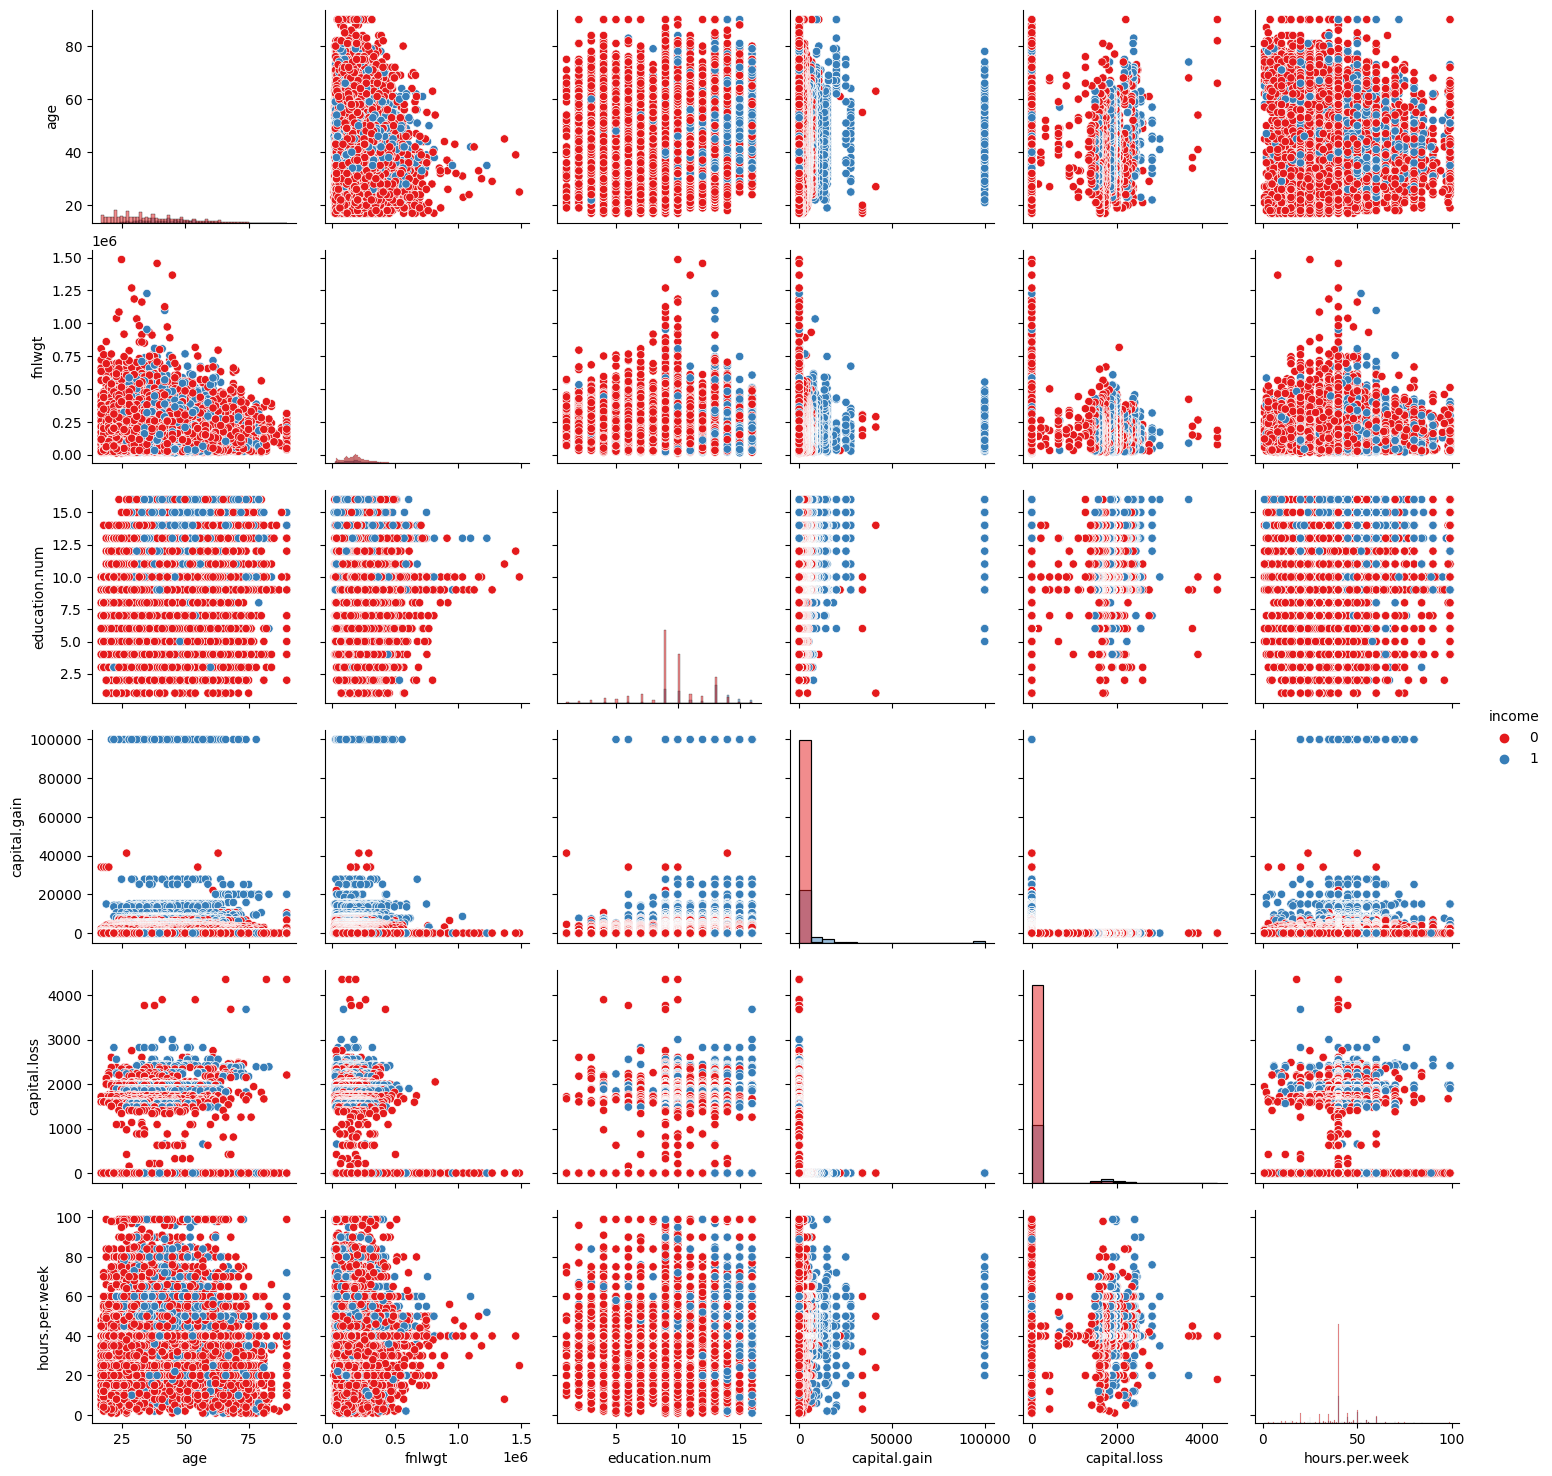

In [28]:
sns.pairplot(df_full, hue='income', diag_kind='hist', palette='Set1')

# Выбрать подходящую таблицу данных (должна содержать числовые и категориальные переменные). Временно убрать категориальные признаки. Построить линейную регрессию.

In [31]:
df_no_categorical = df_full.drop(["workclass", "education", "marital.status", "occupation", "relationship", "race", "native.country", "sex"], axis=1)

df_no_categorical.head(10)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,4356,40,0
1,82,132870,9,0,4356,18,0
2,66,186061,10,0,4356,40,0
3,54,140359,4,0,3900,40,0
4,41,264663,10,0,3900,40,0
5,34,216864,9,0,3770,45,0
6,38,150601,6,0,3770,40,0
7,74,88638,16,0,3683,20,1
8,68,422013,9,0,3683,40,0
9,41,70037,10,0,3004,60,1


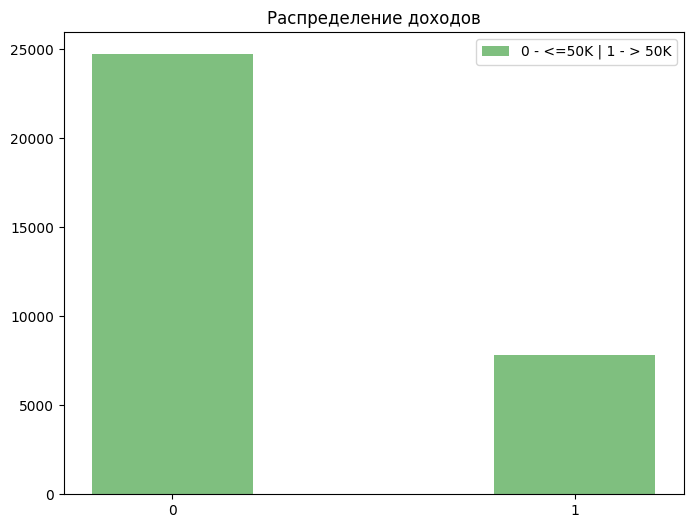

In [54]:
xs_noCat = df_no_categorical.drop("income", axis=1)
ys_noCat = df_no_categorical["income"]

x_train, x_test, y_train, y_test = train_test_split(xs_noCat, ys_noCat, test_size=0.3, random_state=42)

plt.figure(figsize=(8, 6))
plt.title("Распределение доходов")
plt.bar(ys_noCat.value_counts().index, ys_noCat.value_counts(), width=0.4, color='green', alpha=0.5, label="0 - <=50K | 1 - > 50K")
plt.xticks([0, 1])
plt.legend()
plt.show()

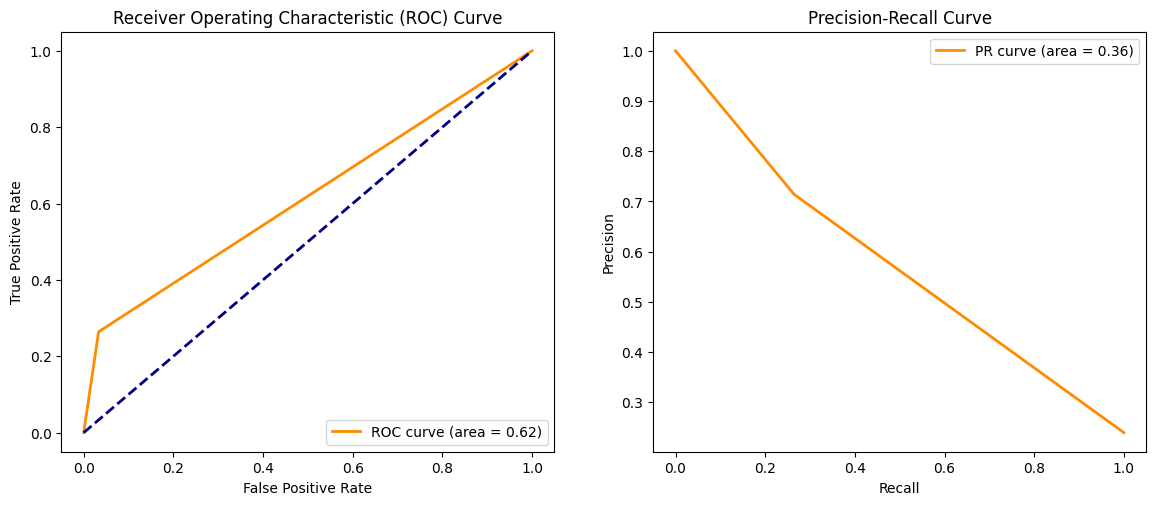

In [34]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, average_precision_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Предположим, что predictions содержит вероятности принадлежности к классу 1
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Построение ROC-кривой
plt.figure(figsize=(14, 12))

plt.subplot(221)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')


plt.subplot(222)
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')

plt.show()

# 2 Построить решение методом бустинга. Сравнить с линейной регрессией.

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

log1 = classification_report(y_test, y_pred)

print(LogRec2 := log1)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7429
           1       0.71      0.26      0.39      2340

    accuracy                           0.80      9769
   macro avg       0.76      0.62      0.63      9769
weighted avg       0.78      0.80      0.76      9769



In [36]:
from sklearn.ensemble import AdaBoostClassifier

base_estimator = LogisticRegression()

model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=250)

model.fit(x_train, y_train)
y_pred_ada = model.predict(x_test)

print(Ada2 :=classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7429
           1       0.71      0.26      0.39      2340

    accuracy                           0.80      9769
   macro avg       0.76      0.62      0.63      9769
weighted avg       0.78      0.80      0.76      9769



       age  fnlwgt  education.num  hours.per.week
19749   58  290661              9              40
1216    62  109463             10              33
27962   33  137088             13              40
23077   24  117767             12              20
10180   67  431426              9               2
...    ...     ...            ...             ...
29802   25  410240              9              40
5390    51  146767             11              40
860     55  238192              9              40
15795   41  154076             10              50
23654   22  162667              9              50

[22792 rows x 4 columns]


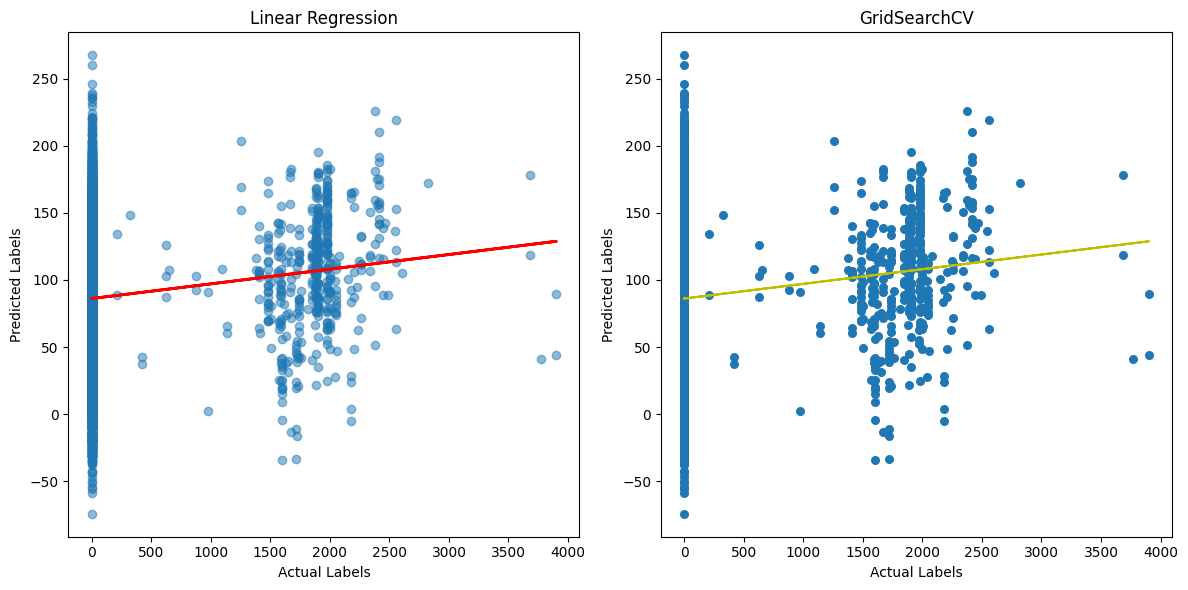

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

df_no_categorical = df_full.drop(["income", "capital.gain", "workclass", "education", "marital.status", "occupation", "relationship", "race", "native.country", "sex"], axis=1)

xs_noCat = df_no_categorical.drop("capital.loss", axis=1)
ys_noCat = df_no_categorical["capital.loss"]

x_train, x_test, y_train, y_test = train_test_split(xs_noCat, ys_noCat, test_size=0.3, random_state=42)

print(x_train)

param_grid = {'fit_intercept': [True, False]}

lr_model = LinearRegression()

grid_search = GridSearchCV(lr_model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
lr_model.fit(x_train, y_train)
lrpred = lr_model.predict(x_test)
grpred = grid_search.predict(x_test)

df = {"label": y_test, "lr_predict": lrpred, "grid_search_pred": grpred}
df = pd.DataFrame(data=df_no_categorical)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
y_pred_boost = best_model.predict(x_test)

n = np.size(y_test)
m_x = np.mean(y_test)
m_y = np.mean(y_pred_boost)
SS_xy = np.sum(y_pred_boost*y_test) - n*m_y*m_x
SS_xx = np.sum(y_test*y_test) - n*m_x*m_x
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x
b = (b_0, b_1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, lrpred, alpha=0.5)
plt.title('Linear Regression')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

slope_lr, intercept_lr = np.polyfit(y_test, lrpred, 1)
plt.plot(y_test, slope_lr * y_test + intercept_lr, color='red', linewidth=2)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_boost, marker = "o", s = 30)
y_pred_1 = b[0] + b[1]*y_test
plt.plot(y_test, y_pred_1, color = "y")
plt.title('GridSearchCV')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")

plt.tight_layout()
plt.show()

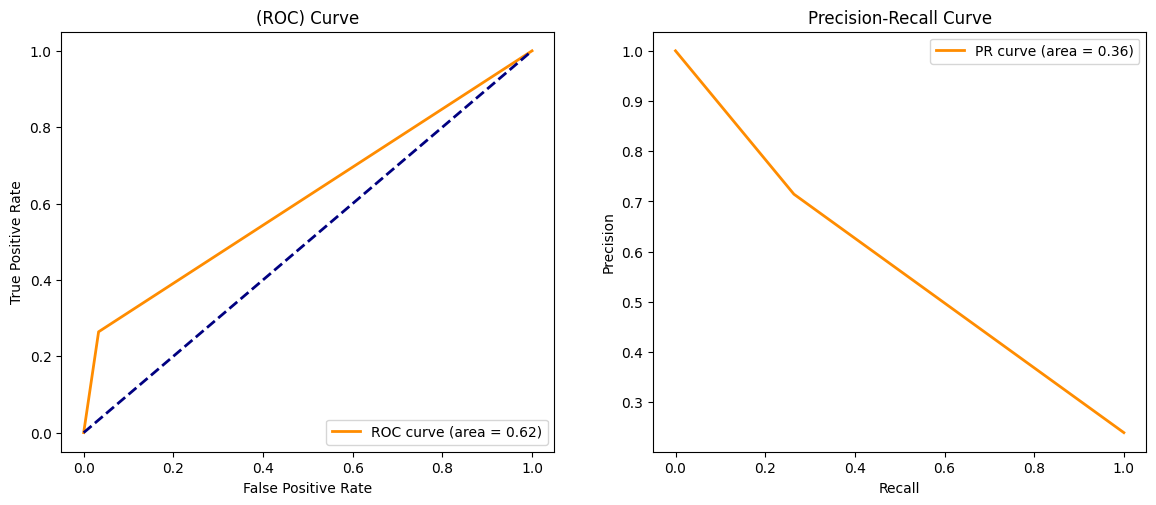

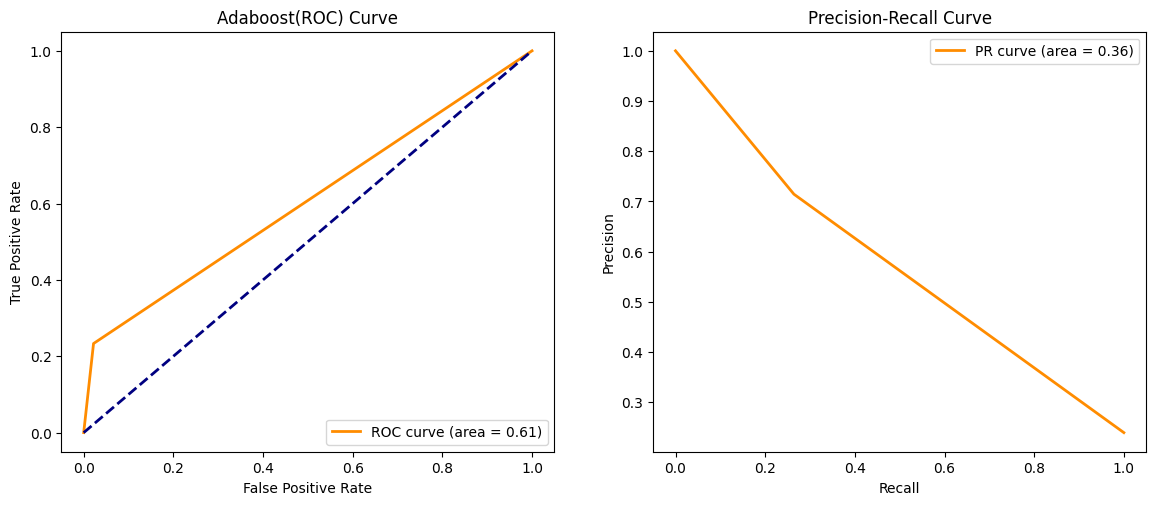

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Предположим, что predictions содержит вероятности принадлежности к классу 1
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Построение ROC-кривой
plt.figure(figsize=(14, 12))

plt.subplot(221)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')

plt.subplot(222)
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
# --------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada)
roc_auc = auc(fpr, tpr)

# Предположим, что predictions содержит вероятности принадлежности к классу 1
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Построение ROC-кривой
plt.figure(figsize=(14, 12))

plt.subplot(221)
plt.title('Adaboost(ROC) Curve')

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')


plt.subplot(222)
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')

# 3. Применить one hot и target encoding для категориальных признаков (взять данные, где такие признаки есть). Сравнить точность.

In [39]:
df_Cats = df_full[["workclass", "education", "marital.status", "occupation", "relationship", "race", "native.country", "sex"]]

df_one_hot = pd.get_dummies(df_Cats)
print(df_one_hot.shape)
df_one_hot.head(10)

(32561, 102)


,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,sex_Female,sex_Male
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
6,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
7,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
8,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
9,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [40]:
df = pd.concat([df_no_categorical, df_one_hot], axis=1) 
df.head(10)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,sex_Female,sex_Male
0,90,77053,9,0,4356,40,0,True,False,False,...,False,False,False,False,False,True,False,False,True,False
1,82,132870,9,0,4356,18,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,66,186061,10,0,4356,40,0,True,False,False,...,False,False,False,False,False,True,False,False,True,False
3,54,140359,4,0,3900,40,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,41,264663,10,0,3900,40,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5,34,216864,9,0,3770,45,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
6,38,150601,6,0,3770,40,0,False,False,False,...,False,False,False,False,False,True,False,False,False,True
7,74,88638,16,0,3683,20,1,False,False,False,...,False,False,False,False,False,True,False,False,True,False
8,68,422013,9,0,3683,40,0,False,True,False,...,False,False,False,False,False,True,False,False,True,False
9,41,70037,10,0,3004,60,1,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [41]:
x_train, x_test, y_train, y_test = train_test_split(df, ys_no_categorical, test_size=0.3, random_state=42)

Only no cat
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7429
           1       0.71      0.26      0.39      2340

    accuracy                           0.80      9769
   macro avg       0.76      0.62      0.63      9769
weighted avg       0.78      0.80      0.76      9769

Only no cat boosting
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7429
           1       0.71      0.26      0.39      2340

    accuracy                           0.80      9769
   macro avg       0.76      0.62      0.63      9769
weighted avg       0.78      0.80      0.76      9769

Both
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7429
           1       0.71      0.26      0.39      2340

    accuracy                           0.80      9769
   macro avg       0.76      0.62      0.63      9769
weighted avg       0.78      0.80   

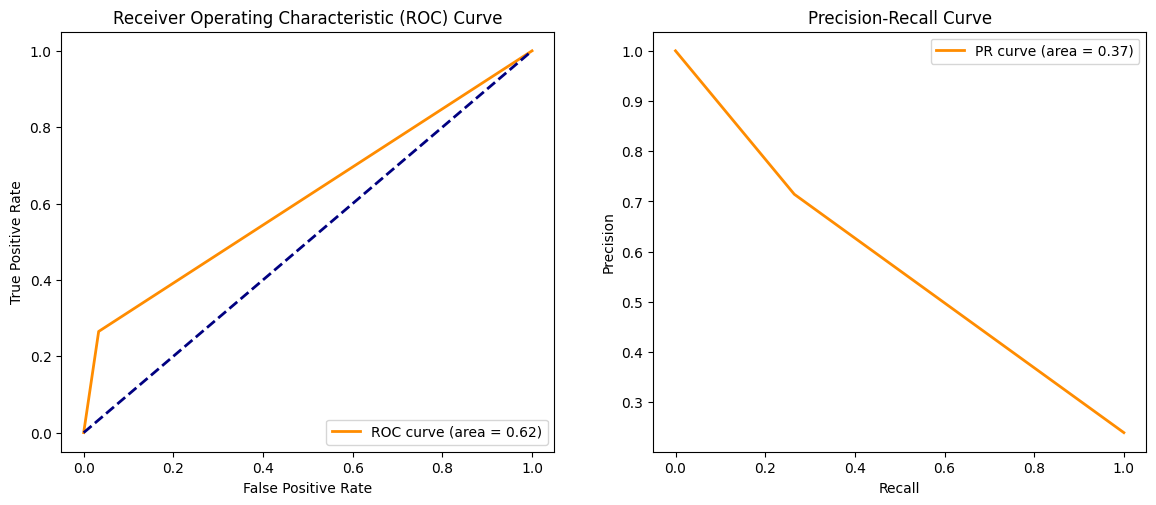

In [53]:
model = LogisticRegression(max_iter=250)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Предположим, что predictions содержит вероятности принадлежности к классу 1
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Построение ROC-кривой
plt.figure(figsize=(14, 12))

plt.subplot(221)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')


plt.subplot(222)
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')

print("Only no cat")
print(LogRec1)

print("Only no cat boosting")
print(Ada2)

print("Both")
print(LogRec3 := classification_report(y_test, y_pred))

In [43]:
base_estimator = LogisticRegression()

model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=250)

model.fit(x_train, y_train)
y_pred_ada = model.predict(x_test)

print(Ada4 :=classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7429
           1       0.71      0.26      0.39      2340

    accuracy                           0.80      9769
   macro avg       0.76      0.62      0.63      9769
weighted avg       0.78      0.80      0.76      9769



In [ ]:
param_grid = {'fit_intercept': [True, False]}

lr_model = LinearRegression()

grid_search = GridSearchCV(lr_model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
lr_model.fit(x_train, y_train)
lrpred = lr_model.predict(x_test)
grpred = grid_search.predict(x_test)

df = {"label": y_test, "lr_predict": lrpred, "grid_search_pred": grpred}
df = pd.DataFrame(data=df)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
y_pred_boost = best_model.predict(x_test)

n = np.size(y_test)
m_x = np.mean(y_test)
m_y = np.mean(y_pred_boost)
SS_xy = np.sum(y_pred_boost*y_test) - n*m_y*m_x
SS_xx = np.sum(y_test*y_test) - n*m_x*m_x
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x
b = (b_0, b_1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, lrpred, alpha=0.5)
plt.title('Linear Regression')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

# Adding separating line for Linear Regression
slope_lr, intercept_lr = np.polyfit(y_test, lrpred, 1)
plt.plot(y_test, slope_lr * y_test + intercept_lr, color='red', linewidth=2)

# Scatter plot for Gradient Boosting
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_boost, marker = "o", s = 30)
y_pred_1 = b[0] + b[1]*y_test
plt.plot(y_test, y_pred_1, color = "y")
plt.title('GridSearchCV')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")

plt.tight_layout()
plt.show()

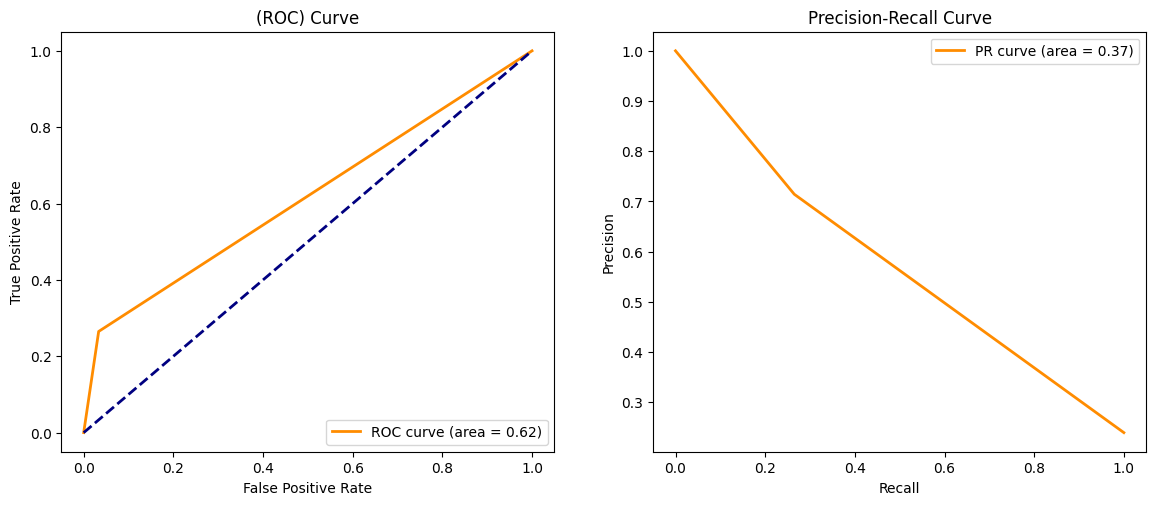

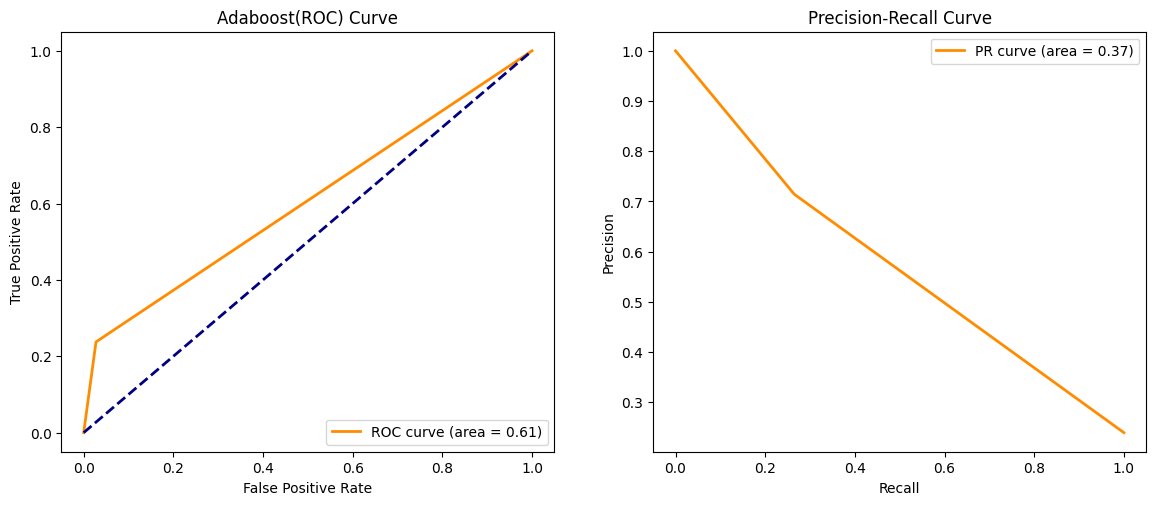

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Предположим, что predictions содержит вероятности принадлежности к классу 1
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Построение ROC-кривой
plt.figure(figsize=(14, 12))

plt.subplot(221)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')


plt.subplot(222)
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
# --------------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada)
roc_auc = auc(fpr, tpr)

# Предположим, что predictions содержит вероятности принадлежности к классу 1
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Построение ROC-кривой
plt.figure(figsize=(14, 12))

plt.subplot(221)
plt.title('Adaboost(ROC) Curve')

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')


plt.subplot(222)
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')

# 4. Визуализировать объекты (не обязательно для той же таблицы) в пространстве главных компонент.

Главные компоненты (Principal Components) - это новые признаки, которые создаются из исходных признаков с помощью линейных комбинаций. Они используются для уменьшения размерности данных и выделения наиболее важных признаков. Главные компоненты выбираются таким образом, чтобы они объясняли максимальное количество дисперсии в данных.

 (PCA) для уменьшения размерности данных и визуализации главных компонент с помощью точечной диаграммы и векторов.

In [45]:
df_full= pd.read_csv("adult.csv")
# Кодируем искомую переменную (0 - меньше 50к доход, 1 - больше 50к доход)
df_full['income'] = df_full['income'].progress_apply(lambda x: 0 if x == "<=50K" else 1)
df_noCat = df_full.drop(["workclass", "education", "marital.status", "occupation", "relationship", "race", "native.country", "sex"], axis=1)

  0%|          | 0/32561 [00:00<?, ?it/s]

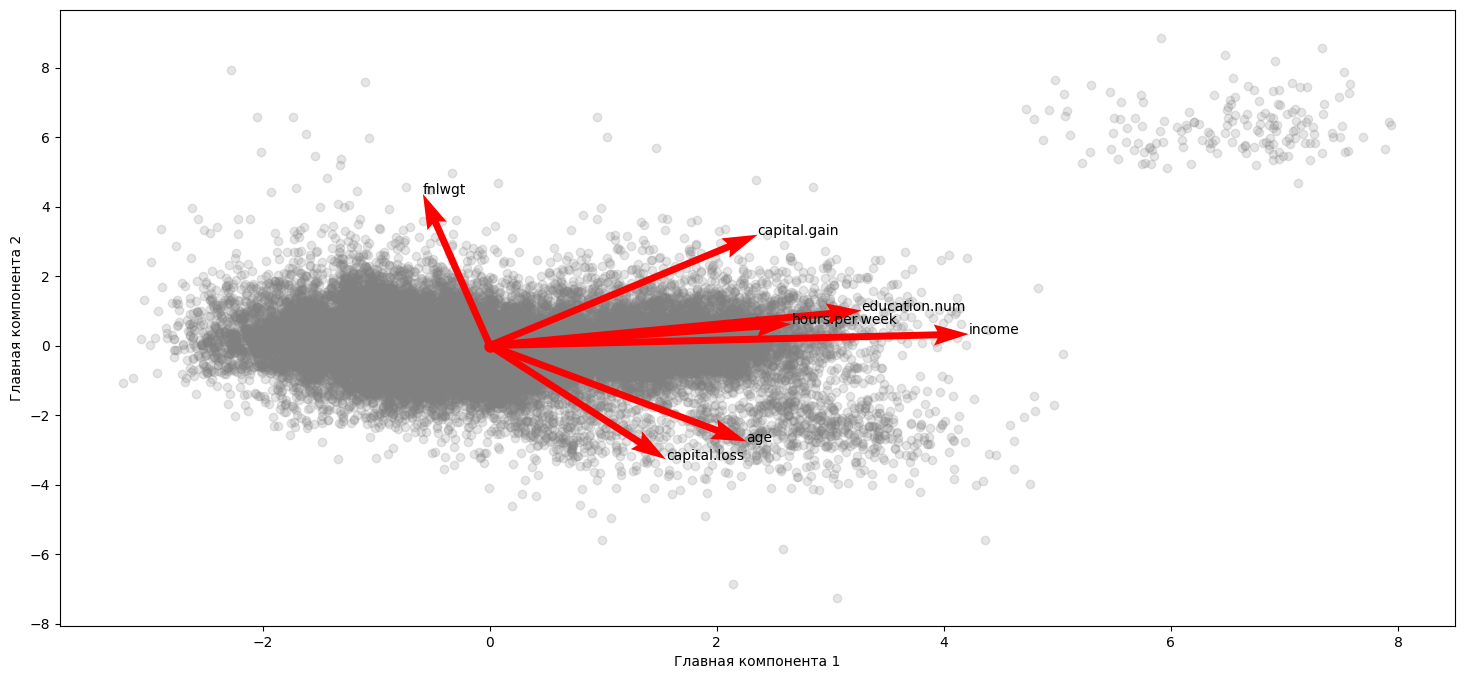

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

componetns_scale = 7

plt.figure(figsize=(18, 8))

scaler = StandardScaler()
pca = PCA(n_components=2)

x_train_norm = scaler.fit_transform(df_noCat)

X_pca = pca.fit_transform(x_train_norm)
pca_components = pca.components_[:2, :]
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='grey', alpha=0.2)
plt.scatter(0, 0, color='red', lw=3)
for i, feature in enumerate(df_noCat.columns):
    plt.quiver(0, 0, pca_components[0, i]*componetns_scale, pca_components[1, i]*componetns_scale, angles='xy', scale_units='xy', scale=1, color='red', width=0.005)
    plt.annotate(feature, (pca_components[0, i]*componetns_scale, pca_components[1, i]*componetns_scale), color='black')

plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()

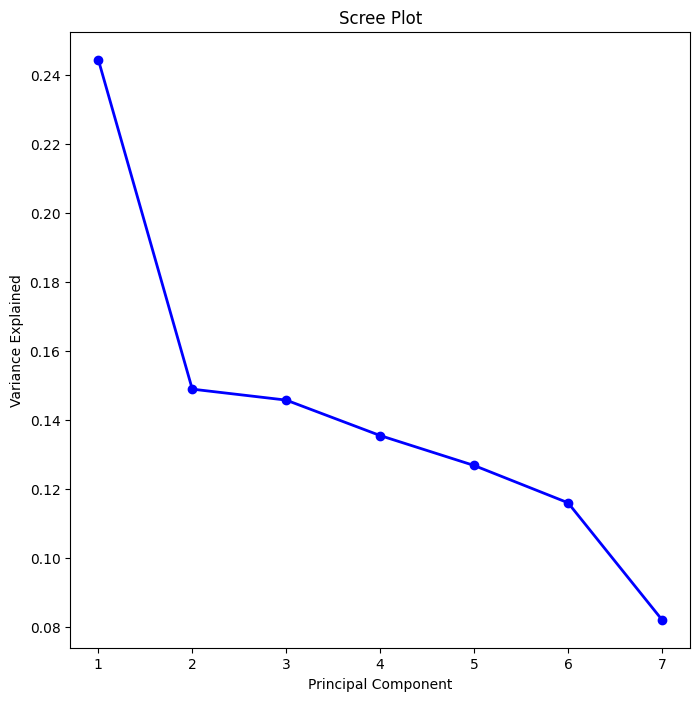

In [56]:
pca = PCA()
pca_fit = pca.fit(x_train_norm)

PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(8,8))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# print("Объем данных для каждой компоненты :", pca.explained_variance_ratio_)
# print("Объем данных для каждого числа компонент :", np.cumsum(pca.explained_variance_ratio_))

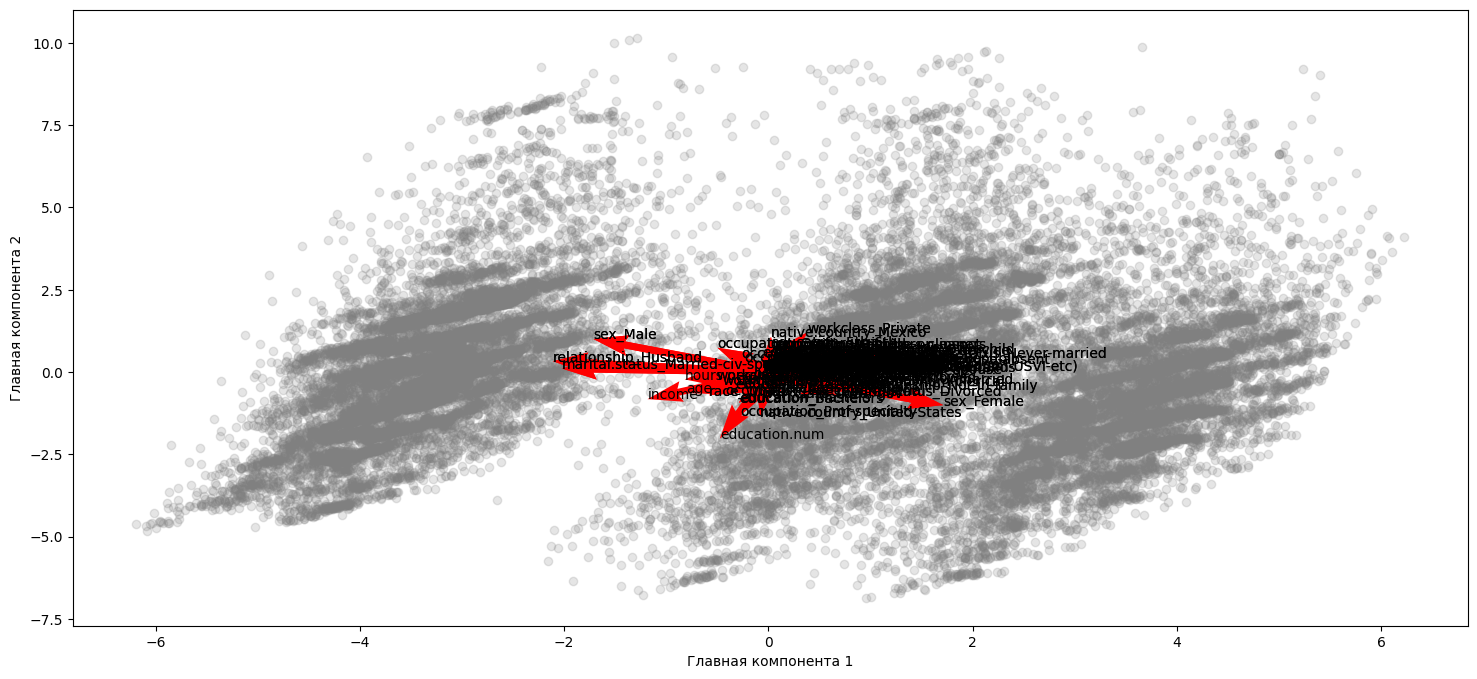

In [109]:
componetns_scale = 7

plt.figure(figsize=(18, 8))

scaler = StandardScaler()
pca = PCA(n_components=2)

x_train_norm = scaler.fit_transform(df_no_categorical)

X_pca = pca.fit_transform(x_train_norm)
pca_components = pca.components_[:2, :]
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='grey', alpha=0.2)
plt.scatter(0, 0, color='red', lw=3)
for i, feature in enumerate(df_no_categorical.columns):
    plt.quiver(0, 0, pca_components[0, i]*componetns_scale, pca_components[1, i]*componetns_scale, angles='xy', scale_units='xy', scale=1, color='red', width=0.005)
    plt.annotate(feature, (pca_components[0, i]*componetns_scale, pca_components[1, i]*componetns_scale), color='black')

plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()

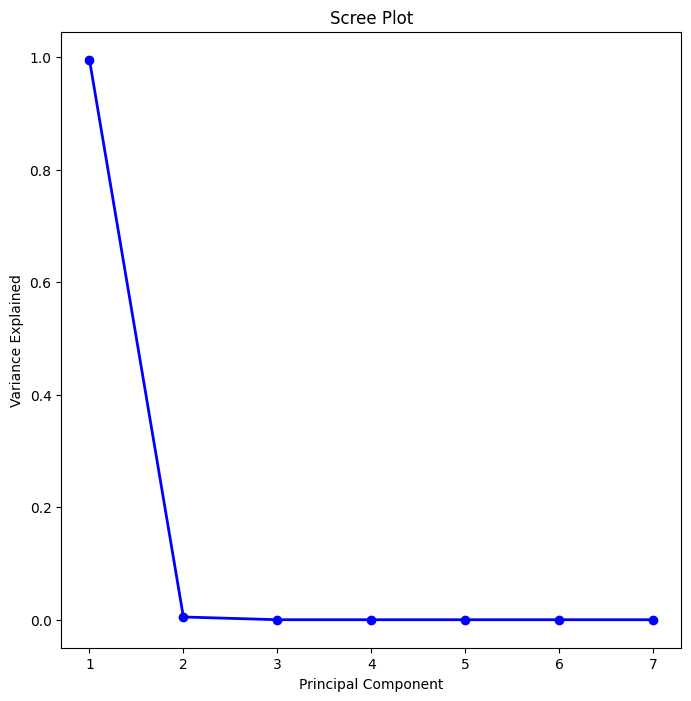

In [55]:
pca = PCA()
pca_fit = pca.fit(df_no_categorical)

PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(8,8))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# print("Объем данных для каждой компоненты :", pca.explained_variance_ratio_)
# print("Объем данных для каждого числа компонент :", np.cumsum(pca.explained_variance_ratio_))

Этот график представляет собой визуализацию результата применения метода главных компонент (PCA) к вашим данным. Вот, что вы можете понять из этого графика:

Точки данных:

Каждая точка на графике представляет одно наблюдение в вашем наборе данных после применения PCA и уменьшения размерности до двух главных компонент.
Красная точка (0, 0):

Это начало координат. В графике PCA оно всегда будет отмечено, так как главные компоненты центрированы относительно нулевой точки.
Стрелки (векторы):

Каждая стрелка представляет один из оригинальных признаков (столбцов) в ваших данных.
Направление стрелки указывает направление максимальной изменчивости (дисперсии) этого признака в пространстве главных компонент.
Длина стрелки показывает, насколько важен этот признак в этом направлении изменчивости.
Значения признаков:

Если вектор направлен вдоль оси, это может указывать на то, что этот признак вносит значительный вклад в данную главную компоненту.
Если вектор короткий, это может означать, что этот признак менее важен в этом направлении изменчивости.
Главные компоненты:

Главные компоненты (PC1 и PC2) представляют собой новые оси координат в пространстве где изменчивость максимальна.
PC1 представляет собой направление максимальной изменчивости, а PC2 — направление второй по величине изменчивости.
Главные компоненты позволяют вам увидеть, какие направления ваши данные вносят наибольший вклад в общую изменчивость. Это может помочь вам понять, какие признаки важны для описания изменчивости данных, а также может быть использовано для уменьшения размерности данных при сохранении наибольшего количества информации.

Scree plot - это график, который отображает собой спектральную структуру матрицы данных. Он часто используется в методе главных компонент (PCA) для определения оптимального числа главных компонент, которые следует использовать при анализе данных.

На scree plot по горизонтальной оси обычно отмечают номера компонент (факторов), а по вертикальной оси - долю объясненной дисперсии (или собственного значения). График обычно имеет форму крутого спуска, после которого кривая выравнивается. Оптимальное число компонент выбирается на основе точки, где кривая начинает выравниваться, и дополнительные компоненты не приносят значительного улучшения объяснения дисперсии данных.

Если на scree plot собственные значения убывают быстро и затем стабилизируются, это может указывать на то, что первые несколько компонент содержат большую часть вариации данных и могут быть использованы для сокращения размерности данных. В противном случае, если кривая медленно убывает, это может говорить о том, что все компоненты играют существенную роль, и не стоит исключать какие-либо из них.

Итак, при анализе scree plot следует обратить внимание на точку, где кривая начинает выравниваться, чтобы определить оптимальное число компонент для использования в дальнейшем анализе.

Метод главных компонент (Principal Component Analysis или PCA) — это статистический метод, используемый для сжатия данных и выделения наиболее важных компонент в наборе данных. PCA позволяет уменьшить размерность данных, сохраняя при этом наибольшую часть их изменчивости.

Вот как работает PCA:

Центрирование данных: Сначала из каждого признака вычитается среднее значение по этому признаку, чтобы центрировать данные вокруг нуля.

Вычисление матрицы ковариации: Затем вычисляется матрица ковариации для центрированных данных. Матрица ковариации отражает степень взаимосвязи между различными признаками.

Вычисление собственных векторов и собственных значений: Далее находятся собственные векторы и собственные значения матрицы ковариации. Собственные векторы представляют собой новые базисные векторы данных, а собственные значения показывают, насколько данные распределены вдоль каждого собственного вектора.

Выбор компонент: Собственные значения сортируются в порядке убывания, и выбираются первые k собственных векторов, где k - количество компонент, которые вы хотите оставить. Обычно это количество меньше, чем исходное количество признаков.

Преобразование данных: Исходные данные умножаются на матрицу, составленную из выбранных собственных векторов (преобразование данных). Это позволяет представить данные в новом пространстве, где оси образованы выбранными главными компонентами.

Таким образом, PCA позволяет представить данные в новом пространстве, где первые несколько компонент объясняют наибольшую часть вариации в данных. Это может быть полезно, например, при сокращении размерности данных, удалении шума и улучшении обобщающей способности моделей машинного обучения.

In [ ]:
param_grid = {'fit_intercept': [True, False]}

lr_model = LinearRegression()

grid_search = GridSearchCV(lr_model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

lr_model.fit(X_train, y_train)
lrpred = lr_model.predict(X_test)
grpred = grid_search.predict(X_test)

df = {"label": y_test, "lr_predict": lrpred, "grid_search_pred": grpred}
df = pd.DataFrame(data=df)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_boost = best_model.predict(X_test)

n = np.size(y_test)
m_x = np.mean(y_test)
m_y = np.mean(y_pred_boost)
SS_xy = np.sum(y_pred_boost*y_test) - n*m_y*m_x
SS_xx = np.sum(y_test*y_test) - n*m_x*m_x
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x
b = (b_0, b_1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, lrpred, alpha=0.5)
plt.title('Linear Regression')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

# Adding separating line for Linear Regression
slope_lr, intercept_lr = np.polyfit(y_test, lrpred, 1)
plt.plot(y_test, slope_lr * y_test + intercept_lr, color='red', linewidth=2)

# Scatter plot for Gradient Boosting
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_boost, marker = "o", s = 30)
y_pred_1 = b[0] + b[1]*y_test
plt.plot(y_test, y_pred_1, color = "y")
plt.title('GridSearchCV')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")

plt.tight_layout()
plt.show()